# Загрузка датасета

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [18]:
!mkdir dataset
!mkdir dataset/COCO

In [19]:
!cp 'drive/My Drive/AU/ImageCaptioning/idx2token.json' .
!cp 'drive/My Drive/AU/ImageCaptioning/encoder-5-1.pth' .
!cp 'drive/My Drive/AU/ImageCaptioning/decoder-5-1.pth' .

In [20]:
!wget http://images.cocodataset.org/zips/train2014.zip
!wget http://images.cocodataset.org/annotations/annotations_trainval2014.zip
!wget http://images.cocodataset.org/zips/val2014.zip

--2020-06-26 03:34:13--  http://images.cocodataset.org/zips/train2014.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 52.216.98.91
Connecting to images.cocodataset.org (images.cocodataset.org)|52.216.98.91|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13510573713 (13G) [application/zip]
Saving to: ‘train2014.zip’

train2014.zip       100%[===================>]  12.58G  26.3MB/s    in 8m 38s  

2020-06-26 03:42:51 (24.9 MB/s) - ‘train2014.zip’ saved [13510573713/13510573713]

--2020-06-26 03:42:53--  http://images.cocodataset.org/annotations/annotations_trainval2014.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 52.216.226.128
Connecting to images.cocodataset.org (images.cocodataset.org)|52.216.226.128|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 252872794 (241M) [application/zip]
Saving to: ‘annotations_trainval2014.zip’

annotations_trainva 100%[===================>] 241.16M  33.1MB/s    in 7.9s 

In [21]:
!unzip -n annotations_trainval2014.zip -d dataset/COCO
!rm annotations_trainval2014.zip
!unzip -n val2014.zip -d dataset/COCO
!rm val2014.zip
!unzip -n train2014.zip -d dataset/COCO
!rm train2014.zip

Выходные данные были обрезаны до нескольких последних строк (5000).
 extracting: dataset/COCO/train2014/COCO_train2014_000000013714.jpg  
 extracting: dataset/COCO/train2014/COCO_train2014_000000194043.jpg  
 extracting: dataset/COCO/train2014/COCO_train2014_000000219859.jpg  
 extracting: dataset/COCO/train2014/COCO_train2014_000000278135.jpg  
 extracting: dataset/COCO/train2014/COCO_train2014_000000141015.jpg  
 extracting: dataset/COCO/train2014/COCO_train2014_000000280923.jpg  
 extracting: dataset/COCO/train2014/COCO_train2014_000000200024.jpg  
 extracting: dataset/COCO/train2014/COCO_train2014_000000435713.jpg  
 extracting: dataset/COCO/train2014/COCO_train2014_000000249993.jpg  
 extracting: dataset/COCO/train2014/COCO_train2014_000000424160.jpg  
 extracting: dataset/COCO/train2014/COCO_train2014_000000142761.jpg  
 extracting: dataset/COCO/train2014/COCO_train2014_000000532668.jpg  
 extracting: dataset/COCO/train2014/COCO_train2014_000000564904.jpg  
 extracting: dataset/C

## Импорты

In [1]:
import torchvision.datasets as dset
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import torch
import random
import numpy as np
import os.path
import os
import torch.optim as optim
from tqdm.auto import tqdm, trange

# Обработка датасета

In [2]:
dataset = os.path.abspath(r'/content/dataset/COCO')
transformations = transforms.Compose([
                              transforms.Resize((512,512)),
                              transforms.ToTensor(),
                              transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])])
train = dset.CocoCaptions(root=dataset + r'/train2014',
                          annFile=dataset + r'/annotations/captions_train2014.json',
                          transform=transformations)

loading annotations into memory...
Done (t=0.83s)
creating index...
index created!


In [3]:
print('Number of samples: ', len(train))
img, target = train[50]  # load 4th sample
t = target[1]

print("Image Size: ", img.size())
print(target)

Number of samples:  82783
Image Size:  torch.Size([3, 512, 512])
['a couple of boats that are in some water', 'A pair of boats docked at a pier is shown.', 'Three boats docked in still water with clouds in the sky. ', 'Three boats are docked together on the cloudy day.', 'some colorful boats sitting next to a dock ']


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


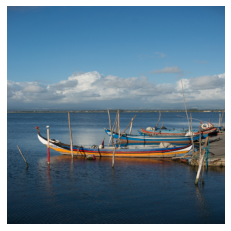

In [4]:
from utils import plot_img
plot_img(img)

# Словарь

In [5]:
from utils import get_all_captions, tokenize, tokenize_captions

Выделяю все подписи из датасета. Это все происходит долго, поэтому лучше сохранить выделенные подписи.

In [6]:
# captions = get_all_captions(train)
# tokens = tokenize_captions(captions)

In [7]:
# with open('captions.json', 'w') as f:
    # json.dump(captions, f)

Строю `defaultdict`, чтобы неизвестные слова автоматически переводились в `<UNK>`.

In [8]:
from utils import build_dict_from

In [9]:
special_tokens = ['<UNK>', '<PAD>', '<START>', '<END>']
# token2idx, idx2token = build_dict(tokens, special_tokens)
token2idx, idx2token = build_dict_from('idx2token.json')

In [10]:
len(token2idx)

24782

In [11]:
# with open('idx2token.json', 'w') as f:
#     json.dump(idx2token, f)

In [12]:
def words2idxs(tokens_list):
    return [token2idx[word] for word in tokens_list]

def idxs2words(idxs):
    return [idx2token[idx] for idx in idxs]

# Нормальная загрузка датасета

Загружаю `train` и `val` датасеты, используя полученный на `train` словарь.

In [13]:
train = dset.CocoCaptions(root=dataset + r'/train2014',
                          annFile=dataset + r'/annotations/captions_train2014.json',
                          transform=transforms.Compose([
                              transforms.Resize((512,512)),
                              transforms.ToTensor(),
                              transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])]))
val = dset.CocoCaptions(root=dataset + r'/val2014',
                          annFile=dataset + r'/annotations/captions_val2014.json',
                          transform=transforms.Compose([
                              transforms.Resize((512,512)),
                              transforms.ToTensor(),
                              transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])]))

loading annotations into memory...
Done (t=0.77s)
creating index...
index created!
loading annotations into memory...
Done (t=0.37s)
creating index...
index created!


Использую `collate_fn`, чтобы из 5 подписей оставлять одну случайную.

Функция для перевода подписи в индексы словаря. Также добавляются специальные токены `<START>`, `<END>` и токены паддинга `<PAD>`. Все выходные подписи становятся длины `seq_length`.

In [14]:
from utils import captions2idxs

In [15]:
# Тест
captions2idxs(['a man is a man', 'a man is', "I'm so sick, it's killing me"],
              words2idxs, max_length=20)

tensor([[    2,    13,   194,    15,    13,   194,     3,     1],
        [    2,    13,   194,    15,     3,     1,     1,     1],
        [    2,  4928,  3184,  8002,    48, 20235,  4343,     3]])

In [16]:
def collate_fn(data):
    ts, cs = tuple(zip(*data))
    batch_captions = [random.choice(c) for c in cs]
    return [torch.stack(ts).float(), captions2idxs(batch_captions, words2idxs)]

In [17]:
device = torch.device('cpu' if not torch.cuda.is_available() else 'cuda')

In [18]:
BATCH_SIZE = 16
train_loader = DataLoader(train, batch_size=BATCH_SIZE, shuffle=True, collate_fn=collate_fn)
val_loader = DataLoader(val, batch_size=BATCH_SIZE, shuffle=True, collate_fn=collate_fn)

Теперь `Encoder` и `Decoder`.

In [19]:
from models import EncoderCNN, DecoderRNN

In [20]:
def to_words(idxs):
    return ' '.join(idxs2words(idxs))

def make_prediction(dataset, encoder, decoder, idxs2sentence=to_words, idx=None):
    if idx==None:
        idx = np.random.randint(0, len(dataset))
        print(idx)
    img = dataset[idx][0]
    plot_img(img)
    img = img.to(device)
    feature = encoder(img.unsqueeze(0))
    print(f'GT: {dataset[idx][1][0]}')
    print(f'Predicted: {idxs2sentence(decoder.sample(feature))}')

Функция для вывода случайного предсказания из `dataset`: выводится `GT`, предсказание и картинка.

In [21]:
encoder = EncoderCNN()
decoder = DecoderRNN(len(token2idx), token2idx['START'], token2idx['<END>'])
encoder.load_weights('encoder-5-1.pth')
decoder.load_weights('decoder-5-1.pth')
encoder.to(device)
decoder.to(device)
vocab_size = len(token2idx)

36122


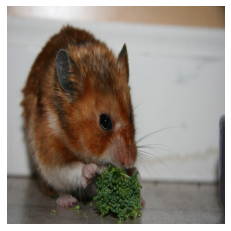

GT: A small brown hamster eating a piece of broccoli.
Predicted: of a woman holding a frisbee


In [22]:
make_prediction(val, encoder, decoder)

In [23]:
from train import Train
from validation import Validation

In [24]:
t = Train(encoder, decoder)
v = Validation(encoder, decoder)

In [26]:
epochs = trange(1, 5+1)
avr_val_loss = None
for epoch in epochs:
    epochs.set_description(f'Epoch {epoch}')
    t.run(train_loader)
    v.run(val_loader)
    avr_val_loss = v.avr_val_losses[-1]

KeyboardInterrupt: ignored

Внизу можно увидеть примеры подписей, пока что без картинок, к сожалению. `GT` - ground truth.

In [ ]:
# function ClickRun(){
#     console.log("Clicked on run button"); 
#     document.querySelector("#connect-button-resource-display").click() // Change id here
# }
# intervalId = setInterval(ClickRun,60000)

In [ ]:
# !cp losses.npy 'drive/My Drive/AU/ImageCaptioning'
# !cp avr_val_losses.npy 'drive/My Drive/AU/ImageCaptioning'

# Предсказания и метрики

In [27]:
from evaluation import get_predictions, get_bleus

In [29]:
# val_predictions = get_predictions(encoder, decoder, val, to_words)
# np.save('val_predictions', val_predictions)
val_predictions = np.load('drive/My Drive/AU/ImageCaptioning/val_predictions.npy')

In [30]:
bleu1, bleu4 = get_bleus(val_predictions, val, tokenize)

KeyboardInterrupt: ignored

In [46]:
# !cp val_predictions.npy 'drive/My Drive/AU/ImageCaptioning'

In [4]:
losses = np.load('drive/My Drive/AU/ImageCaptioning/losses.npy')

In [13]:
n = 100
avg_losses = [np.mean(losses[i:i+n]) for i in range(len(losses) - n)]
max_losses = [np.max(losses[i:i+n]) for i in range(len(losses) - n)]
min_losses = [np.min(losses[i:i+n]) for i in range(len(losses) - n)]

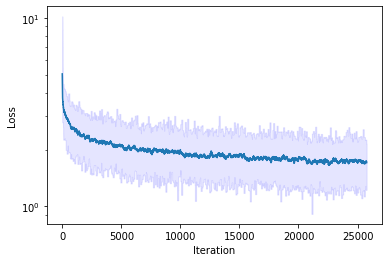

In [17]:
x = np.arange(len(avg_losses))
fig, ax = plt.subplots()
ax.plot(x, avg_losses)
ax.fill_between(x, min_losses, max_losses, color='b', alpha=.1)
plt.yscale('log')
plt.ylabel('Loss')
plt.xlabel('Iteration')
plt.show()

In [31]:
!cp __init__.py 'drive/My Drive/AU/ImageCaptioning/baseline'
!cp evaluation.py 'drive/My Drive/AU/ImageCaptioning/baseline'
!cp models.py 'drive/My Drive/AU/ImageCaptioning/baseline'
!cp train.py 'drive/My Drive/AU/ImageCaptioning/baseline'
!cp utils.py 'drive/My Drive/AU/ImageCaptioning/baseline'
!cp validation.py 'drive/My Drive/AU/ImageCaptioning/baseline'